In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

path = "Resources/COVID_final_data.csv"

data = pd.read_csv(path)
data_lat = data[data.Latitude !='Not Available'].reset_index(drop=True)
data_lat

,Unnamed: 0,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
0,0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167
1,1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275
2,2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.389000,173.758000,169.988000,Algiers,36.7631
3,3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5
4,4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.124000,101.353000,94.635416,Luanda,-8.8383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,194,"Venezuela, RB",VEN,80404,671,8.35,28515829.0,281.96,2.35,0.000000,0.000000,0.000000,Caracas,10.501
181,195,Vietnam,VNM,1099,35,31.85,96462108.0,1.14,0.04,223.780000,245.214000,261.921000,Hanoi,21.0333
182,196,"Yemen, Rep.",YEM,2053,594,289.33,29161922.0,7.04,2.04,24.561328,27.591262,0.000000,Sanaa,15.3547
183,197,Zambia,ZMB,15224,334,21.94,17861034.0,85.24,1.87,25.868142,27.005239,23.064722,Lusaka,-15.4166


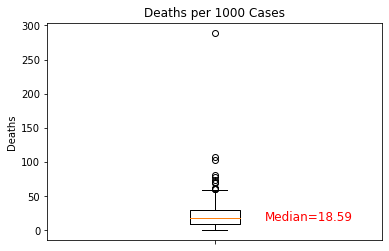

In [8]:
plt.boxplot(data['Deaths per 1000 Cases'])
plt.title('Deaths per 1000 Cases')
plt.ylabel('Deaths')
plt.annotate(f"Median={data['Deaths per 1000 Cases'].median()}",(1.15,15),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.show()

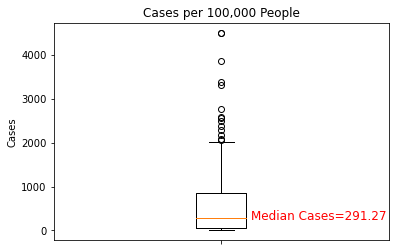

In [9]:
plt.boxplot(data['Cases per 100,000 People'])
plt.title('Cases per 100,000 People')
plt.ylabel('Cases')
plt.annotate(f"Median Cases={data['Cases per 100,000 People'].median()}",(1.09,250),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.savefig("Resources/casesper100k_box.png")
plt.show()

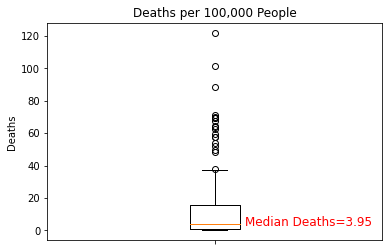

In [10]:
plt.boxplot(data['Deaths per 100,000 People'])
plt.title('Deaths per 100,000 People')
plt.ylabel('Deaths')
plt.annotate(f"Median Deaths={data['Deaths per 100,000 People'].median()}",(1.09,3),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.savefig("Resources/deathsper100k_box.png")
plt.show()

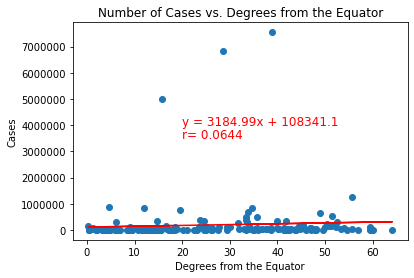

In [2]:
lat_abs = data_lat['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs,data_lat['Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases')
plt.title('Number of Cases vs. Degrees from the Equator')
plt.ticklabel_format(style='plain')
slope6, intercept6, r6, p6, std_err6 = st.linregress(lat_abs,data_lat['Cases'])
fit6 = slope6 * lat_abs + intercept6
plt.plot(lat_abs,fit6,color='r')
line_eq6 = f"y = {round(slope6,2)}x + {round(intercept6,2)}"
plt.annotate(line_eq6,(20,4000000),fontsize=12,color="red")
plt.annotate(f"r= {round(r6,4)}",(20,3500000),fontsize=12,color="red")
plt.savefig("Resources/cases_vs_degrees.png")
plt.show()

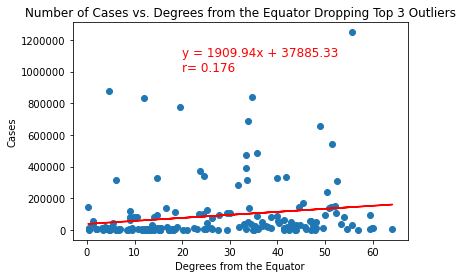

In [4]:
data_lat_cases = data_lat.sort_values('Cases',ascending=False)
data_lat_cases = data_lat_cases.iloc[3:]
lat_abs_cases = data_lat_cases['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs_cases,data_lat_cases['Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases')
plt.title('Number of Cases vs. Degrees from the Equator Dropping Top 3 Outliers')
plt.ticklabel_format(style='plain')
slope4, intercept4, r4, p4, std_err4 = st.linregress(lat_abs_cases,data_lat_cases['Cases'])
fit4 = slope4 * lat_abs_cases + intercept4
plt.plot(lat_abs_cases,fit4,color='r')
line_eq4 = f"y = {round(slope4,2)}x + {round(intercept4,2)}"
plt.annotate(line_eq4,(20,1100000),fontsize=12,color="red")
plt.annotate(f"r= {round(r4,4)}",(20,1000000),fontsize=12,color="red")
plt.savefig("Resources/cases_vs_degrees_dropoutliers.png")
plt.show()

r=0.0593


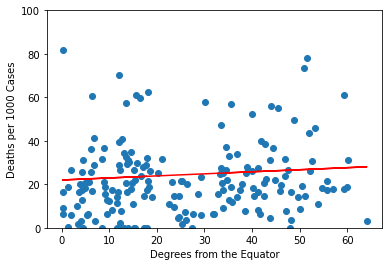

In [5]:
plt.scatter(lat_abs,data_lat['Deaths per 1000 Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 1000 Cases')
plt.ylim(0,100)
slope, intercept, r, p, std_err = st.linregress(lat_abs, data_lat['Deaths per 1000 Cases'])
fit = slope * lat_abs + intercept
plt.plot(lat_abs,fit,color='r')
print(f"r={round(r,4)}")
plt.show()

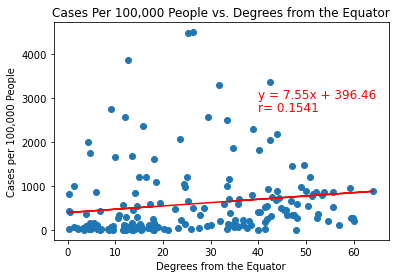

In [6]:
plt.scatter(lat_abs,data_lat['Cases per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases per 100,000 People')
plt.title('Cases Per 100,000 People vs. Degrees from the Equator')
slope2, intercept2, r2, p2, std_err2 = st.linregress(lat_abs, data_lat['Cases per 100,000 People'])
fit2 = slope2 * lat_abs + intercept2
plt.plot(lat_abs,fit2,color='r')
line_eq2 = f"y = {round(slope2,2)}x + {round(intercept2,2)}"
plt.annotate(line_eq2,(40,3000),fontsize=12,color="red")
plt.annotate(f"r= {round(r2,4)}",(40,2700),fontsize=12,color="red")
plt.savefig("Resources/casesper100k_vs_degrees.png")
plt.show()

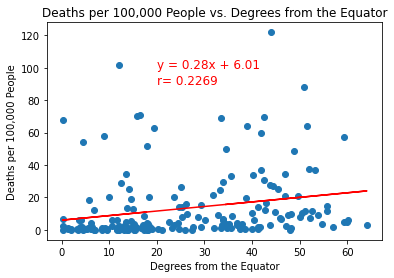

In [7]:
plt.scatter(lat_abs,data_lat['Deaths per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 100,000 People')
plt.title('Deaths per 100,000 People vs. Degrees from the Equator')
slope3, intercept3, r3, p3, std_err3 = st.linregress(lat_abs, data_lat['Deaths per 100,000 People'])
fit3 = slope3 * lat_abs + intercept3
plt.plot(lat_abs,fit3,color='r')
line_eq3 = f"y = {round(slope3,2)}x + {round(intercept3,2)}"
plt.annotate(line_eq3,(20,100),fontsize=12,color="red")
plt.annotate(f"r= {round(r3,4)}",(20,90),fontsize=12,color="red")
plt.savefig("Resources/deathsper100k_vs_degrees.png")
plt.show()

In [ ]:
data_lat_deaths_per = data_lat.sort_values('Deaths per 100,000 People',ascending=False)
data_lat_deaths_per = data_lat_deaths_per.iloc[3:]
lat_abs_deaths_per = data_lat_deaths_per['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs_deaths_per,data_lat_deaths_per['Deaths per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 100,000 People')
plt.title('Deaths per 100,000 People vs. Degrees from the Equator Removing the Top 3 Outliers')
plt.ylim(0,80)
slope5, intercept5, r5, p5, std_err5 = st.linregress(lat_abs_deaths_per, data_lat_deaths_per['Deaths per 100,000 People'])
fit5 = slope5 * lat_abs_deaths_per + intercept5
plt.plot(lat_abs_deaths_per,fit5,color='r')
line_eq5 = f"y = {round(slope5,2)}x + {round(intercept5,2)}"
plt.annotate(line_eq5,(20,58),fontsize=12,color="red")
plt.annotate(f"r= {round(r5,4)}",(20,53),fontsize=12,color="red")
plt.show()